<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/Lab3_Class_KTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [99]:
#import file csv
df_training = pd.read_csv("adult.data.csv")
df_test = pd.read_csv("adult.test.csv")


In [100]:
# Xóa các hàng có dấu "?"
df_training.replace(' ?',np.nan,inplace=True)
df_training=df_training.dropna()



In [101]:
# Xóa các hàng có dấu "?"
df_test.replace(' ?',np.nan,inplace=True)
df_test=df_test.dropna()

In [106]:
# xóa cột fnlwgt
df_training = df_training.drop('fnlwgt', axis=1)

# in ra 5 dòng đầu tiên của dữ liệu huấn luyện sau khi xóa cột fnlwgt
print(df_training.head(5))

   age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-State

In [102]:
count_training = len(df_training.index)


In [103]:
count_test = len(df_test.index)

In [104]:
print(count_training)
print(count_test)

30162
15060


In [105]:
data = pd.concat([df_training, df_test], axis=0)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  int64  
 1   workclass       45222 non-null  object 
 2   fnlwgt          30162 non-null  float64
 3   education       45222 non-null  object 
 4   education-num   45222 non-null  int64  
 5   marital-status  45222 non-null  object 
 6   occupation      45222 non-null  object 
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  object 
 9   sex             45222 non-null  object 
 10  capital-gain    45222 non-null  int64  
 11  capital-loss    45222 non-null  int64  
 12  hours-per-week  45222 non-null  int64  
 13  native-country  45222 non-null  object 
 14  income          45222 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 5.5+ MB


<ipython-input-108-1f9a8d8c84d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot = True)


<Axes: >

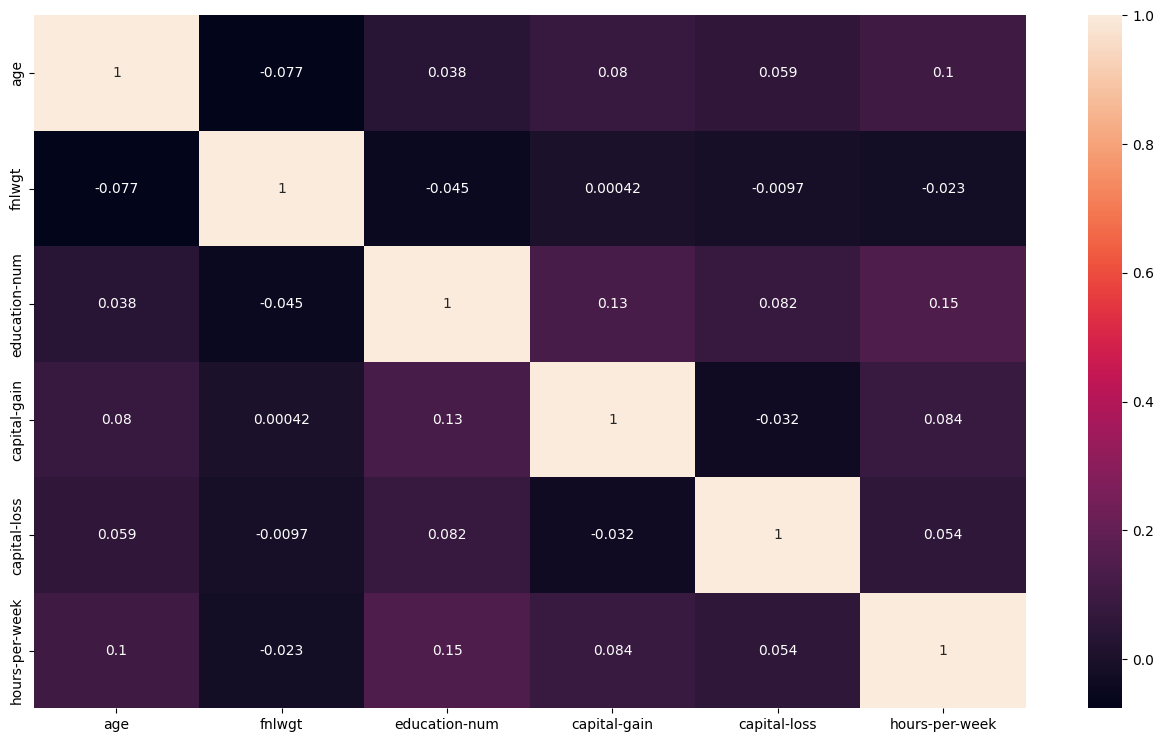

In [108]:
#3
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot = True)

In [35]:
#4
features = data.drop('income', axis = 1)
labels = data['income']

In [109]:
#5
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [110]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,13,0,0,36,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16277,64,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,38,13,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16279,44,13,5455,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [121]:
#6
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

In [122]:
#7
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [123]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy", tree_score)
print("Report", metrics.classification_report(y_test, tree_pred))

Accuracy 0.8220556745182013
Report               precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88     14230
        >50K       0.63      0.60      0.62      4450

    accuracy                           0.82     18680
   macro avg       0.76      0.75      0.75     18680
weighted avg       0.82      0.82      0.82     18680



In [125]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8220556745182013')

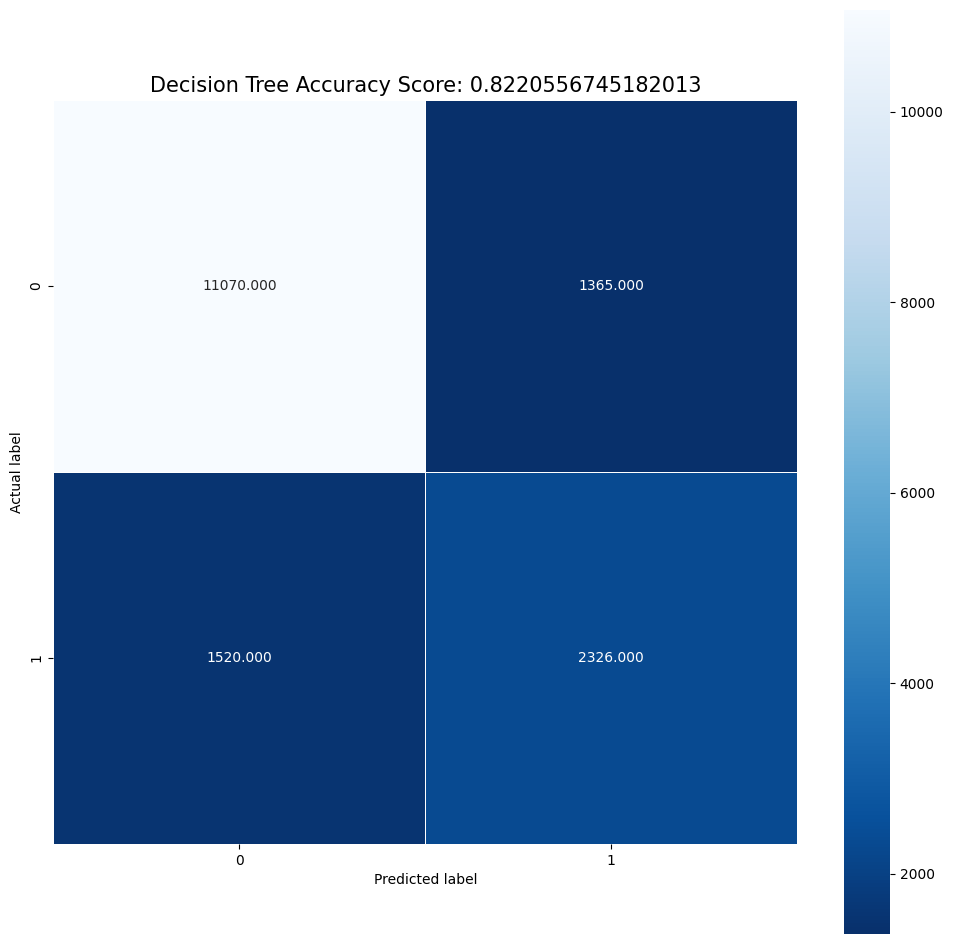

In [124]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square= True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

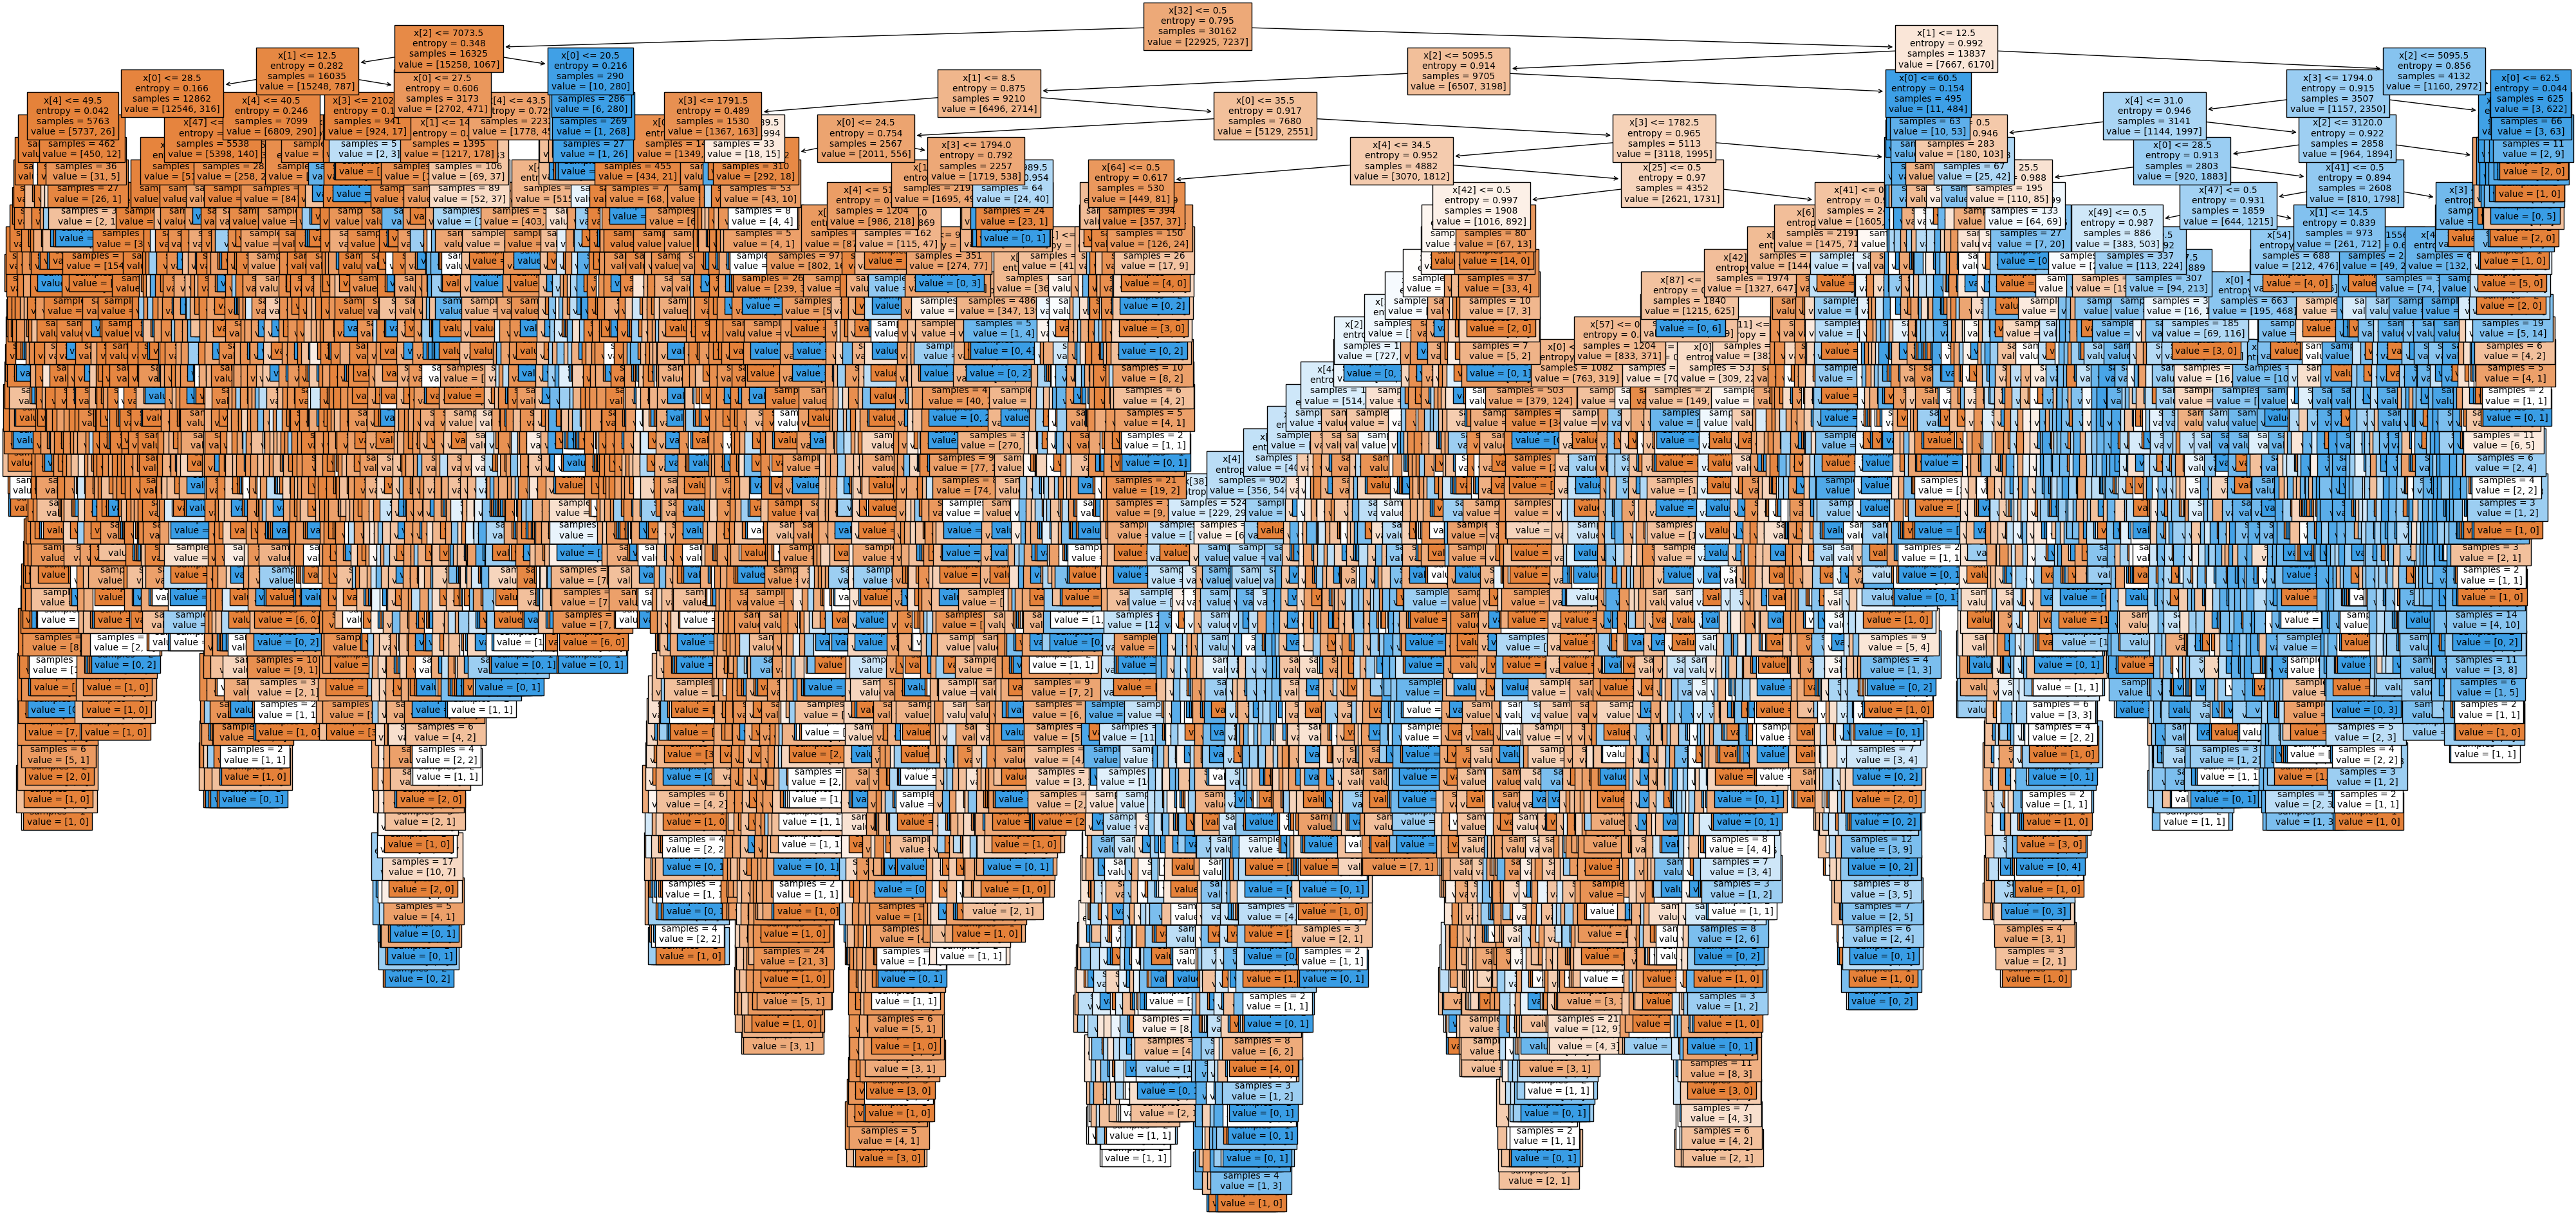

In [126]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [127]:
#8
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [128]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy", tree_score)
print("Report", metrics.classification_report(y_test, tree_pred))

Accuracy 0.8167558886509636
Report               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     14230
        >50K       0.62      0.60      0.61      4450

    accuracy                           0.82     18680
   macro avg       0.75      0.74      0.75     18680
weighted avg       0.81      0.82      0.82     18680



In [130]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8167558886509636')

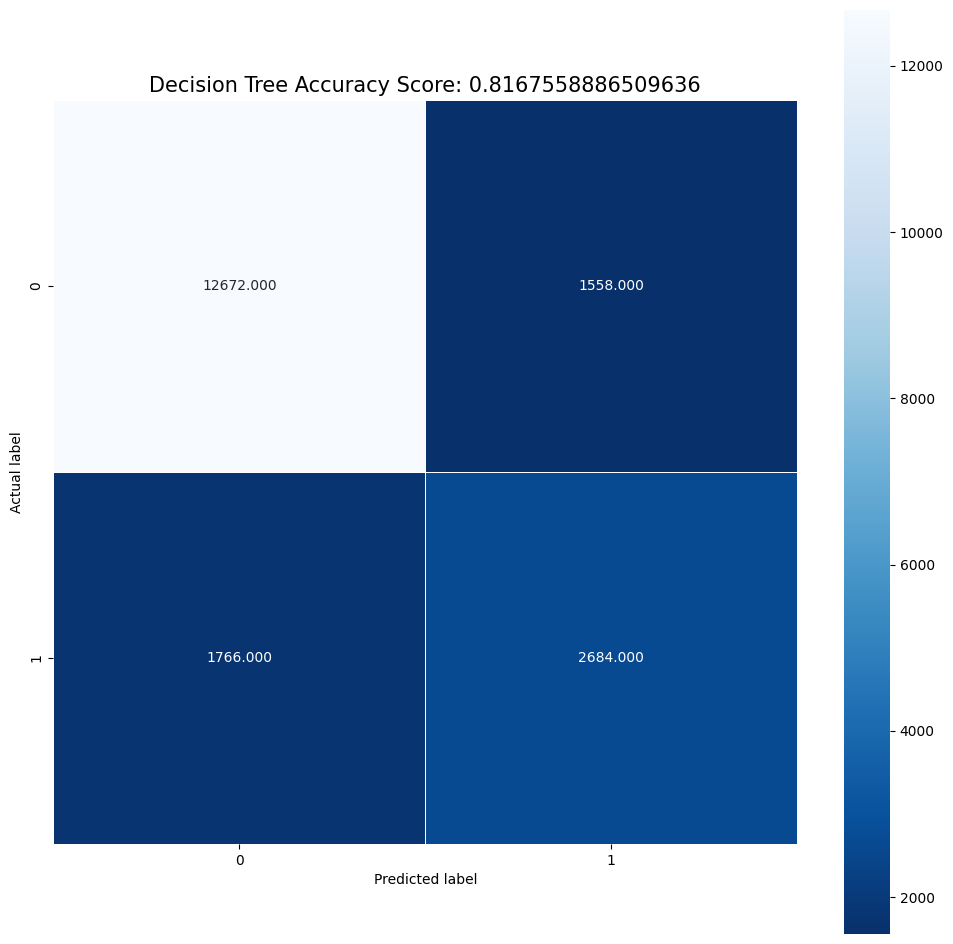

In [129]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square= True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

In [ ]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()

In [ ]:
#9
gnb=GaussianNB()
bayes_pred = gnb.fit(X_train,y_train).predict(X_test)
#
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy: ", bayes_score)
print("Report: ", metrics.classification_report(y_test,bayes_pred))

Text(0.5, 1.0, 'Navie Bayes Accuracy Score: 0.8027762422455623')

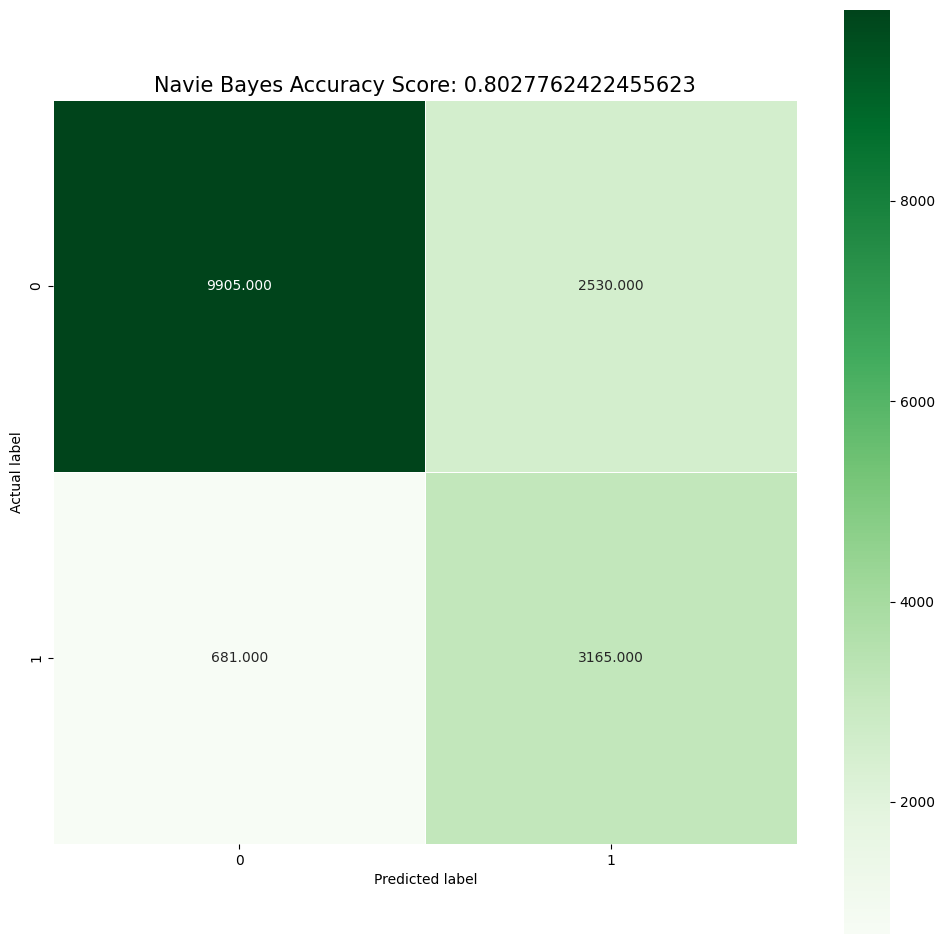

In [51]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot = True, fmt=".3f", linewidths=.5, square= True, cmap='Greens');
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
title = 'Navie Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title,size = 15)

In [120]:
#Lưu CSV
df_training.to_csv('training.csv', index=False)
df_test.to_csv('test.csv',index=False)
data.to_csv('combine.csv', index=False)
